In [1]:
from tensorflow.keras.layers.experimental.preprocessing import StringLookup
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

2022-01-28 19:06:20.946983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-28 19:06:20.947020: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
base_path = "data"
words_list = []

In [3]:


words = open(f"{base_path}/words.txt", "r").readlines()



In [4]:
print(words[0:10])

['#--- words.txt ---------------------------------------------------------------#\n', '#\n', '# iam database word information\n', '#\n', '# format: a01-000u-00-00 ok 154 1 408 768 27 51 AT A\n', '#\n', '#     a01-000u-00-00  -> word id for line 00 in form a01-000u\n', '#     ok              -> result of word segmentation\n', '#                            ok: word was correctly\n', '#                            er: segmentation of word can be bad\n']


In [5]:
#print(words[0:10])
for line in words:
    if line[0] == "#":
        continue
    if line.split(" ")[1] != "err":  # We don't need to deal with errored entries.
        words_list.append(line)

len(words_list)

np.random.shuffle(words_list)

In [6]:
print(words_list[0])

e04-030-04-08 ok 170 1489 1499 120 39 JJ sure



In [7]:
split_idx = int(0.9 * len(words_list))
print(split_idx)

86810


In [8]:
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

print(train_samples[0],test_samples[0])

e04-030-04-08 ok 170 1489 1499 120 39 JJ sure
 b01-136-01-01 ok 182 511 915 132 91 JJ able



In [9]:
val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]


assert len(words_list) == len(train_samples) + len(validation_samples) + len(
    test_samples
)

print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total training samples: 86810
Total validation samples: 4823
Total test samples: 4823


In [10]:
print(val_split_idx)

4823


In [11]:
print(validation_samples[0],test_samples[0])

b01-136-01-01 ok 182 511 915 132 91 JJ able
 g01-067-03-02 ok 152 832 1308 286 82 VBN altered



In [12]:
base_image_path = os.path.join(base_path, "words")

In [13]:
def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        #print(line_split)
        line_split = line_split.split(" ")
        #print(line_split)

        # Each line split will have this format for the corresponding image:
        # part1/part1-part2/part1-part2-part3.png
        image_name = line_split[0]
      #  print(image_name)
        partI = image_name.split("-")[0]
      #  print(partI)
        partII = image_name.split("-")[1]
       # print("part 2",partII)
        img_path = os.path.join(
            base_image_path, partI, partI + "-" + partII, image_name + ".png"
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(file_line.split("\n")[0])
           # print(corrected_samples[0])

    return paths, corrected_samples

In [14]:
train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)

In [15]:
print(train_img_paths[0], train_labels[0])

data/words/e04/e04-030/e04-030-04-08.png e04-030-04-08 ok 170 1489 1499 120 39 JJ sure


In [16]:
print(validation_img_paths[0], validation_labels[0])

data/words/b01/b01-136/b01-136-01-01.png b01-136-01-01 ok 182 511 915 132 91 JJ able


In [17]:
# Find maximum length and the size of the vocabulary in the training data.
train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
    label = label.split(" ")[-1].strip()
    for char in label:
        characters.add(char)

    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label)

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

# Check some label samples.
train_labels_cleaned[:10]

Maximum length:  21
Vocab size:  78


['sure',
 'he',
 'during',
 'of',
 'booty',
 'gastronomy',
 'boy',
 'The',
 'and',
 'in']

In [18]:
#import pickle
 
#with open('characters.pkl', 'wb') as f:

#   pickle.dump(characters, f)

In [19]:
import pickle
with open('characters.pkl', 'rb') as f:
   characters = pickle.load(f)

In [20]:
characters

{'!',
 '"',
 '#',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [21]:
#vocab1=list(characters)


import pickle
 
#with open('vocab1.pkl', 'wb') as f:

#   pickle.dump(vocab1, f)

import pickle
with open('vocab1.pkl', 'rb') as f:
   vocab1= pickle.load(f)


In [22]:
vocab1

['a',
 '.',
 '"',
 'P',
 '1',
 'K',
 '6',
 'J',
 '4',
 '#',
 'B',
 '9',
 '*',
 'o',
 'w',
 'R',
 'Z',
 'b',
 'G',
 ',',
 'e',
 '(',
 'S',
 'x',
 'i',
 'y',
 '+',
 't',
 'r',
 'm',
 'h',
 'W',
 '7',
 ':',
 'X',
 'q',
 ')',
 '2',
 'V',
 'D',
 'g',
 'F',
 's',
 'j',
 ';',
 'd',
 'M',
 'L',
 'n',
 'Y',
 '!',
 'E',
 'C',
 '3',
 '0',
 'N',
 '?',
 'v',
 'u',
 'p',
 'f',
 'k',
 '&',
 '5',
 'I',
 'T',
 '8',
 'U',
 '-',
 'H',
 'c',
 'A',
 'l',
 'z',
 'Q',
 'O',
 "'",
 '/']

In [23]:
def clean_labels(labels):
    cleaned_labels = []
    for label in labels:
        label = label.split(" ")[-1].strip()
        cleaned_labels.append(label)
    return cleaned_labels


validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)

In [24]:
test_labels_cleaned[0:10]

['altered',
 'Here',
 "'",
 'the',
 'It',
 'up',
 'edges',
 'The',
 'position',
 'scratched']

In [25]:
AUTOTUNE = tf.data.AUTOTUNE

# Mapping characters to integers.
char_to_num = StringLookup(vocabulary=vocab1, mask_token=None)

# Mapping integers back to original characters.
num_to_char = StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

2022-01-28 19:09:27.894724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-28 19:09:27.895110: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-28 19:09:27.895145: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (admin1-HP-EliteBook-840-G1): /proc/driver/nvidia/version does not exist
2022-01-28 19:09:27.897483: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
#num_to_char 

In [27]:
#example for string lookup
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/StringLookup

#vocab = ["a", "b", "c", "d"]
#data = tf.constant([["a", "c", "d"], ["m", "z", "b"]])
#layer = tf.keras.layers.StringLookup(vocabulary=vocab, num_oov_indices=2)
#layer(data)

In [28]:
def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

    # Check tha amount of padding needed to be done.
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]

    # Only necessary if you want to do same amount of padding on both sides.
    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image

In [29]:
batch_size = 64
padding_token = 99
image_width = 128
image_height = 32

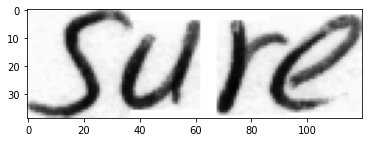

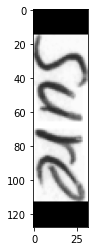

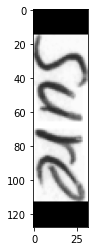

In [30]:
#def preprocess_image(image_path, img_size=(image_width, image_height)):
image = tf.io.read_file(train_img_paths[0])
#plt.imshow(image)
#plt.show()
image = tf.image.decode_png(image, 1)
plt.imshow(image,cmap="gray")
plt.show()
image = distortion_free_resize(image,(image_width, image_height))    #calling above function  here
plt.imshow(image,cmap="gray")
plt.show()
image = tf.cast(image, tf.float32) / 255.0
 #   return image
plt.imshow(image,cmap="gray")
plt.show()

In [31]:
#train_img_paths[0], train_labels[0])

print(train_labels_cleaned[0])
label = char_to_num(tf.strings.unicode_split(train_labels_cleaned[0], input_encoding="UTF-8"))              #called 3rd
print(label)
length = tf.shape(label)[0]
print(length)
pad_amount = max_len - length
print(pad_amount)
label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
print(label)
#return label



sure
tf.Tensor([43 59 29 21], shape=(4,), dtype=int64)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor([43 59 29 21 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99], shape=(21,), dtype=int64)


In [32]:
#https://www.tensorflow.org/api_docs/python/tf/data/Dataset

#example   for     tf.data.Dataset.from_tensor_slices
#dataset1 = tf.data.Dataset.from_tensor_slices([1, 2, 3])
#for element1 in dataset1:
#  print(element1)

In [47]:
batch_size = 32
padding_token = 99
image_width = 128
image_height = 32


def preprocess_image(image_path, img_size=(image_width, image_height)):     #called 4th 
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, 1)
    image = distortion_free_resize(image, img_size)    #calling above function  here
    image = tf.cast(image, tf.float32) / 255.0
    return image


def vectorize_label(label):
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))              #called 3rd
    length = tf.shape(label)[0]
    pad_amount = max_len - length
    label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
    return label


def process_images_labels(image_path, label):                     #called 2nd
    image = preprocess_image(image_path)
    label = vectorize_label(label)
    return {"image": image, "label": label}






def prepare_dataset(image_paths, labels):           #called 1
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(         
        process_images_labels, num_parallel_calls=AUTOTUNE
    )
    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

In [48]:
train_ds = prepare_dataset(train_img_paths, train_labels_cleaned)
validation_ds = prepare_dataset(validation_img_paths, validation_labels_cleaned)
test_ds = prepare_dataset(test_img_paths, test_labels_cleaned)


print(train_ds)
print(validation_ds)
print(test_ds)

<PrefetchDataset shapes: {image: (None, None, None, 1), label: (None, None)}, types: {image: tf.float32, label: tf.int64}>
<PrefetchDataset shapes: {image: (None, None, None, 1), label: (None, None)}, types: {image: tf.float32, label: tf.int64}>
<PrefetchDataset shapes: {image: (None, None, None, 1), label: (None, None)}, types: {image: tf.float32, label: tf.int64}>


In [49]:
#for data in train_ds.take(1):
#    images, labels = data["image"], data["label"]
#    print("this is image in tensor",images)
#    print("this is the tensor value for the label",label)

2022-01-28 19:18:18.055823: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


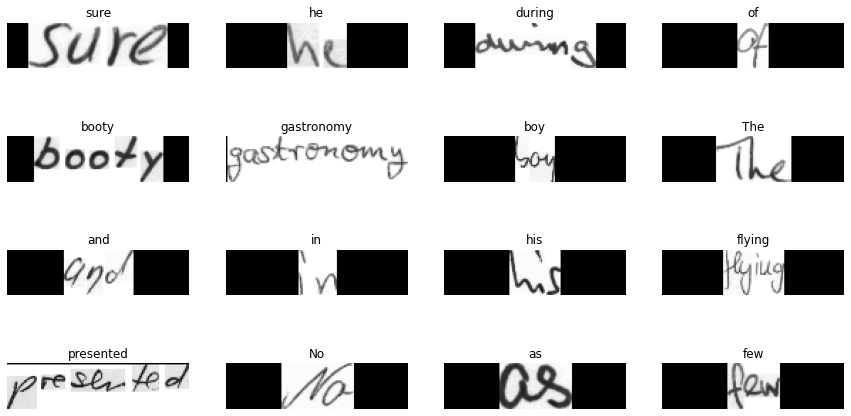

In [50]:
for data in train_ds.take(1):
    images, labels = data["image"], data["label"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    for i in range(16):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        # Gather indices where label!= padding_token.
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
        # Convert to string.
        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")


plt.show()

In [62]:
class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions.
        return y_pred


def build_model():
    # Inputs to the model
    input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
    labels = keras.layers.Input(name="label", shape=(None,))

    # First conv block.
    x = keras.layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = keras.layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block.
    x = keras.layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = keras.layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model.
    new_shape = ((image_width // 4), (image_height // 4) * 64)
    x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
    x = keras.layers.Dropout(0.2)(x)

    # RNNs.
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
    )(x)
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
    )(x)

    # +2 is to account for the two special tokens introduced by the CTC loss.
    # The recommendation comes here: https://git.io/J0eXP.
    x = keras.layers.Dense(
        len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step.
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model.
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
    )
    # Optimizer.
    opt = keras.optimizers.Adam()
    # Compile the model and return.
    model.compile(optimizer=opt)
    return model


# Get the model.
model = build_model()
model.summary()

Model: "handwriting_recognizer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 128, 32, 1)] 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 32, 32)  320         image[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 64, 16, 32)   0           Conv1[0][0]                      
__________________________________________________________________________________________________
Conv2 (Conv2D)                  (None, 64, 16, 64)   18496       pool1[0][0]                      
_____________________________________________________________________________

In [63]:
validation_images = []
validation_labels = []

for batch in validation_ds:
    validation_images.append(batch["image"])
    validation_labels.append(batch["label"])

In [64]:
validation_images

[<tf.Tensor: shape=(32, 128, 32, 1), dtype=float32, numpy=
 array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [

In [65]:
#https://www.tensorflow.org/api_docs/python/tf/edit_distance


def calculate_edit_distance(labels, predictions):
    # Get a single batch and convert its labels to sparse tensors.
    saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

    # Make predictions and convert them to sparse tensors.
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    predictions_decoded = keras.backend.ctc_decode(
        predictions, input_length=input_len, greedy=True
    )[0][0][:, :max_len]
    sparse_predictions = tf.cast(
        tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
    )

    # Compute individual edit distances and average them out.
    edit_distances = tf.edit_distance(
        sparse_predictions, saprse_labels, normalize=False
    )
    return tf.reduce_mean(edit_distances)


class EditDistanceCallback(keras.callbacks.Callback):
    def __init__(self, pred_model):
        super().__init__()
        self.prediction_model = pred_model

    def on_epoch_end(self, epoch, logs=None):
        edit_distances = []

        for i in range(len(validation_images)):
            labels = validation_labels[i]
            predictions = self.prediction_model.predict(validation_images[i])
            edit_distances.append(calculate_edit_distance(labels, predictions).numpy())

        print(
            f"Mean edit distance for epoch {epoch + 1}: {np.mean(edit_distances):.4f}"
        )

In [66]:
epochs =50 # To get good results this should be at least 50.

model = build_model()
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
edit_distance_callback = EditDistanceCallback(prediction_model)

#model.compile()

#try:
#             prediction_model.save("handwritten_text.h5")

#             prediction_model.save_weights("ckpt")
#             load_status = sequential_model.load_weights("ckpt")

# `assert_consumed` can be used as validation that all variable values have been
# restored from the checkpoint. See `tf.train.Checkpoint.restore` for other
# methods in the Status object.
#             load_status.assert_consumed()
#             model1 = keras.models.load_model('handwritten_text.h5')

#except:
    
#             print("models are not saved and loaded")
    



In [57]:
# Train the model.
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs
)

Epoch 1/50
   1/2713 [..............................] - ETA: 4:44:46 - loss: 124.8175

2022-01-28 19:18:37.075924: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 24772608 exceeds 10% of free system memory.


   2/2713 [..............................] - ETA: 13:57 - loss: 115.9965  

2022-01-28 19:18:37.394090: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 24772608 exceeds 10% of free system memory.


   3/2713 [..............................] - ETA: 13:40 - loss: 107.4337

2022-01-28 19:18:37.695180: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 24772608 exceeds 10% of free system memory.


   4/2713 [..............................] - ETA: 13:38 - loss: 99.2038 

2022-01-28 19:18:37.987720: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 24772608 exceeds 10% of free system memory.


   5/2713 [..............................] - ETA: 13:23 - loss: 90.9823

2022-01-28 19:18:38.281073: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 24772608 exceeds 10% of free system memory.


2713/2713 [==============================] - 702s 257ms/step - loss: 12.7740 - val_loss: 11.2524
Epoch 2/50
2713/2713 [==============================] - 647s 238ms/step - loss: 9.7528 - val_loss: 8.2694
Epoch 3/50
2713/2713 [==============================] - 659s 243ms/step - loss: 7.4249 - val_loss: 5.8178
Epoch 4/50
2713/2713 [==============================] - 654s 241ms/step - loss: 5.6508 - val_loss: 4.4829
Epoch 5/50
2713/2713 [==============================] - 650s 239ms/step - loss: 4.6619 - val_loss: 3.6657
Epoch 6/50
2713/2713 [==============================] - 649s 239ms/step - loss: 4.0437 - val_loss: 3.2694
Epoch 7/50
2713/2713 [==============================] - 651s 240ms/step - loss: 3.6383 - val_loss: 3.0497
Epoch 8/50
2713/2713 [==============================] - 648s 239ms/step - loss: 3.3487 - val_loss: 2.6954
Epoch 9/50
2713/2713 [==============================] - 650s 240ms/step - loss: 3.1389 - val_loss: 2.6474
Epoch 10/50
2713/2713 [==============================] 

In [58]:
prediction_model.save("handwritten_text_50.h5")

In [59]:

model1 = keras.models.load_model('handwritten_text_50.h5')

#model1 =tf.saved_model.load(('handwritten_text.h5'))

2022-01-29 04:20:09.082990: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


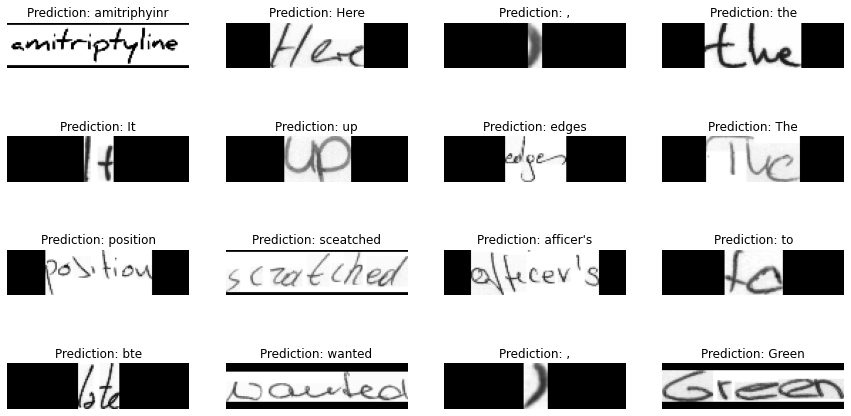

In [60]:
# A utility function to decode the output of the network.
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]
    # Iterate over the results and get back the text.
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some test samples.
for batch in test_ds.take(1):
    batch_images = batch["image"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = model1.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    for i in range(16):
        img = batch_images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")

plt.show()

['amitriphyinr', 'Here', ',', 'the', 'It', 'up', 'edges', 'The', 'position', 'sceatched', "afficer's", 'to', 'bte', 'wanted', ',', 'Green', 'inspiration', '.', 'He', 'irritatea', 'he', 'weeks', 'to', 'teing', ',', 'and', 'of', 'opened', 'Thetan', 'of', 'is', 'riglleousnes']


2022-01-29 04:20:10.388776: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


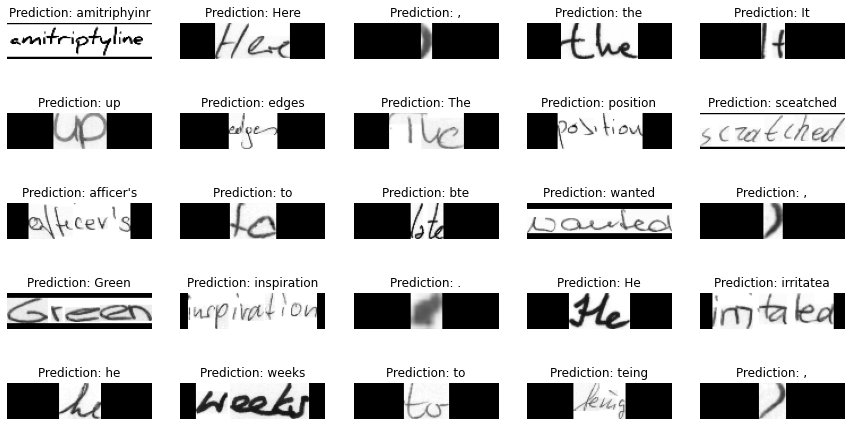

In [61]:
#  Let's check results on some test samples.
for batch in test_ds.take(1):
    #print(batch)
    batch_images = batch["image"]
    _, ax = plt.subplots(5, 5, figsize=(15, 8))

    preds = model1.predict(batch_images)
    #print(preds)
    pred_texts = decode_batch_predictions(preds)
    print(pred_texts)

    for i in range(25):
        img = batch_images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        title = f"Prediction: {pred_texts[i]}"
        ax[i // 5, i % 5].imshow(img, cmap="gray")
        ax[i // 5, i % 5].set_title(title)
        ax[i // 5, i % 5].axis("off")

plt.show()